# Transfer Learning with ResNet50

## Model Summary:
- **Architecture:** ResNet50 (Pre-trained on ImageNet, `include_top=False`)
- **Input Shape:** 224 × 224 × 3 RGB images
- **Top Layers Added:**
  - Global Average Pooling
  - Dropout (0.2)
  - Dense Layer with 8 output units (softmax activation)
- **Base Model:** Frozen (non-trainable during initial training)

##  Training Hyperparameters:
- **Optimizer:** Adam
- **Loss Function:** Sparse Categorical Crossentropy
- **Metrics:** Accuracy
- **Epochs:** 30
- **Batch Size:** Default (from `image_dataset_from_directory`)
- **Data Augmentation:**  *Not Applied*

##  Training Results:
- Trained on 794 images across 8 classes
- Validation on 198 images
- Plotted **Training vs Validation Accuracy** and **Loss Curves**
- Observed gradual improvement in accuracy and loss with stable performance around epoch 20+

##  Saved Model:
- Model saved as: **`resnet50_plant_disease.keras`**
- Used later for evaluation and comparison with other models



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from data_loader import load_dataset

# Load Data
train_ds, val_ds = load_dataset('./plantdisease_subset')

# Create ResNet Model with 8 Classes
base_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(8, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

# Save Model
model.save('resnet50_plant_disease.keras')


Found 992 files belonging to 8 classes.
Using 794 files for training.
Found 992 files belonging to 8 classes.
Using 198 files for validation.
Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 188s 7s/step - accuracy: 0.2608 - loss: 2.0999 - val_accuracy: 0.7323 - val_loss: 0.8729
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 191s 7s/step - accuracy: 0.7674 - loss: 0.7602 - val_accuracy: 0.8586 - val_loss: 0.5373
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.8744 - loss: 0.4466 - val_accuracy: 0.8737 - val_loss: 0.4402
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.9049 - loss: 0.3417 - val_accuracy: 0.8990 - val_loss: 0.3781
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 193s 6s/step - accuracy: 0.9423 - loss: 0.2781 - val_accuracy: 0.9040 - val_loss: 0.3513
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.9429 - loss: 0.2200 - val_accuracy: 0.9293 - val_loss: 0.3183
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.9643 - loss: 0.1988 - val_accur

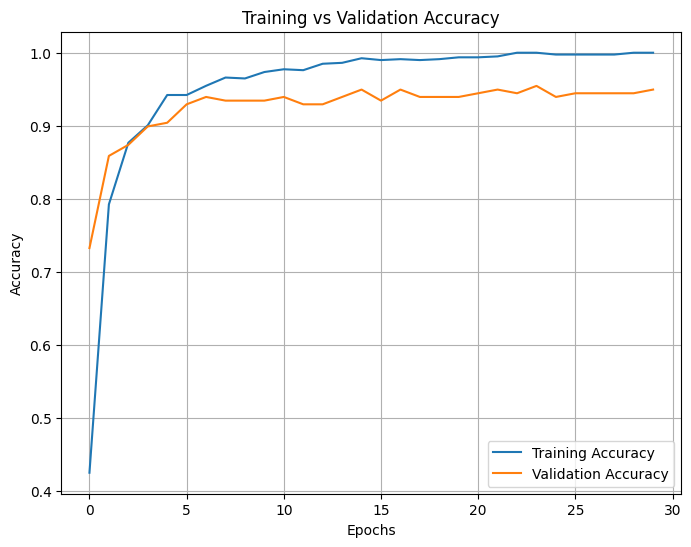

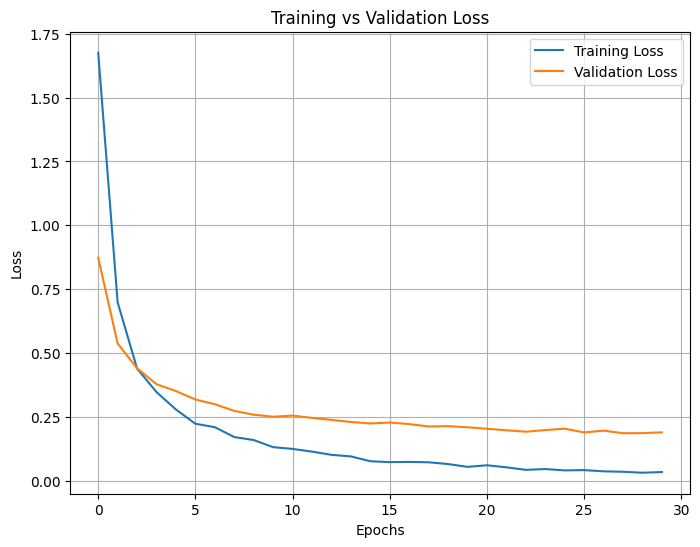

In [ ]:
#  Plot Training & Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Found 992 files belonging to 8 classes.
Using 794 files for training.
Found 992 files belonging to 8 classes.
Using 198 files for validation.


<Figure size 1000x800 with 0 Axes>

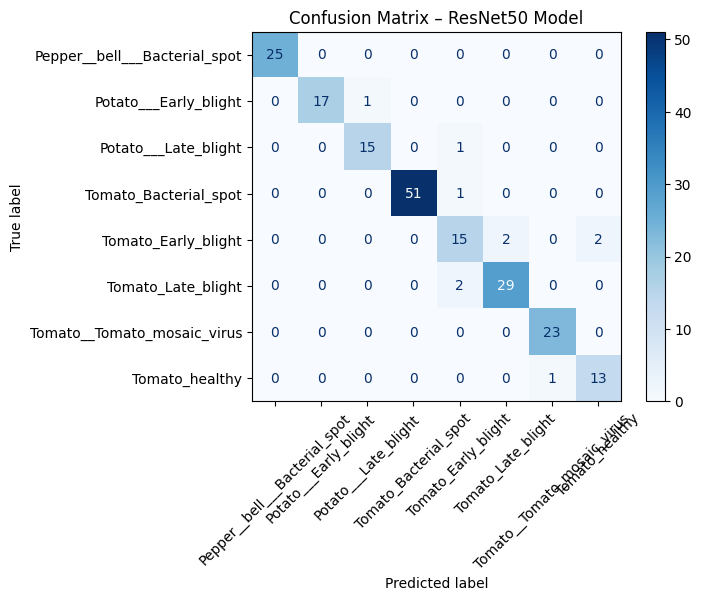


Classification Report – ResNet50 Model:

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       1.00      1.00      1.00        25
        Potato___Early_blight       1.00      0.94      0.97        18
         Potato___Late_blight       0.94      0.94      0.94        16
        Tomato_Bacterial_spot       1.00      0.98      0.99        52
          Tomato_Early_blight       0.79      0.79      0.79        19
           Tomato_Late_blight       0.94      0.94      0.94        31
  Tomato__Tomato_mosaic_virus       0.96      1.00      0.98        23
               Tomato_healthy       0.87      0.93      0.90        14

                     accuracy                           0.95       198
                    macro avg       0.94      0.94      0.94       198
                 weighted avg       0.95      0.95      0.95       198



In [ ]:

model = tf.keras.models.load_model('resnet50_plant_disease.keras')


_, val_ds = load_dataset('./plantdisease_subset')

class_names = val_ds.class_names


y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    preds_class = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds_class)


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix – ResNet50 Model")
plt.show()


print("\nClassification Report – ResNet50 Model:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

##  ResNet50 Model Evaluation – Confusion Matrix & Classification Report

###  Confusion Matrix Observations:
- **Perfect classification** for:
  - Pepper__bell___Bacterial_spot
  - Tomato__Tomato_mosaic_virus
- **Very high accuracy** on:
  - Tomato_Bacterial_spot (51/52 correct)
  - Tomato_Late_blight (29/31 correct)
  - Potato___Early_blight and Potato___Late_blight with only 1 misclassification each
- **Tomato_healthy** had slight confusion (13/14 correct)
- **Tomato_Early_blight** had a moderate recall of **79%**

---

###  Classification Report Highlights:
| Class | Precision | Recall | F1-Score |
|---|---|---|---|
| Pepper__bell___Bacterial_spot | 1.00 | 1.00 | 1.00 |
| Potato___Early_blight | 1.00 | 0.94 | 0.97 |
| Potato___Late_blight | 0.94 | 0.94 | 0.94 |
| Tomato_Bacterial_spot | 1.00 | 0.98 | 0.99 |
| Tomato_Early_blight | 0.79 | 0.79 | 0.79 |
| Tomato_Late_blight | 0.94 | 0.94 | 0.94 |
| Tomato__Tomato_mosaic_virus | 0.96 | 1.00 | 0.98 |
| Tomato_healthy | 0.87 | 0.93 | 0.90 |

- **Overall Accuracy:** **95%**
- **Macro Average F1-Score:** **0.94**
- **Weighted Average F1-Score:** **0.95**

---

###  Conclusion:
- The **ResNet50 model** achieved **the highest validation accuracy so far** among tested models.
- Very minimal misclassifications.
- Demonstrates excellent generalization, even without fine-tuning.
- Excellent candidate for further tuning or deployment.
